In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
Data = pd.read_csv("Zoo.csv")

In [3]:
Data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#To types of classes
print(Data['type'].value_counts())

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [6]:
#Droping Animal name column becoz that is not usefull in predicting
Data1 = Data.drop("animal name",axis=1)

In [7]:
Data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
array = Data1.values
X = array[:,0:16]
Y = array[:,16]

In [11]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [12]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

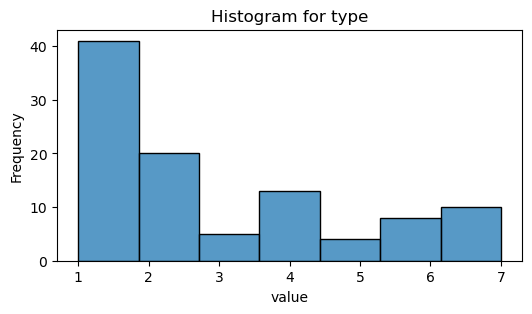

In [20]:
#Data for ploting To type columns value
Hist_type = Data1.type
#Creating the histogram for Total_Sales_Value
plt.figure(figsize=(6,3))
sns.histplot(Hist_type, bins=7)
plt.title("Histogram for type")
plt.xlabel("value")
plt.ylabel("Frequency")
plt.show()

In [23]:
model = KNeighborsClassifier(n_neighbors=7, metric ='euclidean')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 4, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [27]:
Predict = pd.DataFrame()
Predict["y_test"]= y_test
Predict["y_pred"] = y_pred

In [28]:
Predict

,y_test,y_pred
0,1,1
1,1,1
2,1,4
3,1,1
4,1,1
5,6,6
6,1,1
7,1,1
8,1,1
9,1,1


In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, ))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21

Confusion Matrix:
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  0]]


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
dframe = pd.DataFrame()
dframe["no_neighbours"]= range(1,30)
dframe["Accuracy"] = pd.DataFrame(k_scores)

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 

In [35]:
dframe

,no_neighbours,Accuracy
0,1,0.9750
1,2,0.9500
2,3,0.9250
3,4,0.8500
4,5,0.8375
5,6,0.8250
6,7,0.8500
7,8,0.8125
8,9,0.7875
9,10,0.7375


In [36]:
dframe.sort_values(by = "Accuracy",ascending=False)

,no_neighbours,Accuracy
0,1,0.9750
1,2,0.9500
2,3,0.9250
3,4,0.8500
6,7,0.8500
4,5,0.8375
5,6,0.8250
7,8,0.8125
8,9,0.7875
9,10,0.7375


Text(0, 0.5, 'Accuracy')

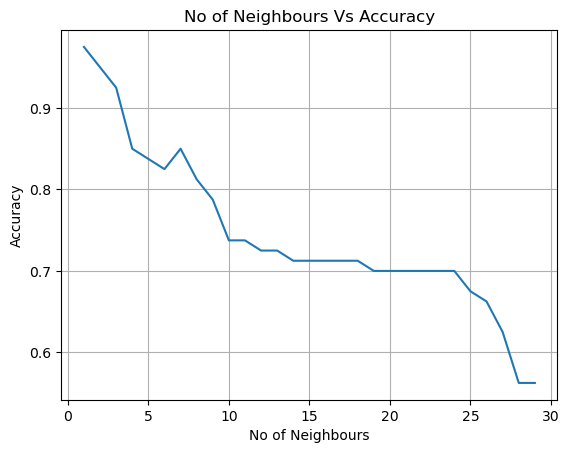

In [37]:
plt.grid()
plt.plot(dframe["no_neighbours"],dframe["Accuracy"])
plt.title("No of Neighbours Vs Accuracy")
plt.xlabel("No of Neighbours")
plt.ylabel("Accuracy")